First 5 rows of the dataset:
   Customer ID  Age  Annual Income  Spending Score
0            1   19          15000              39
1            2   21          18000              81
2            3   20          29000               6
3            4   23          20000              77
4            5   31          35000              40


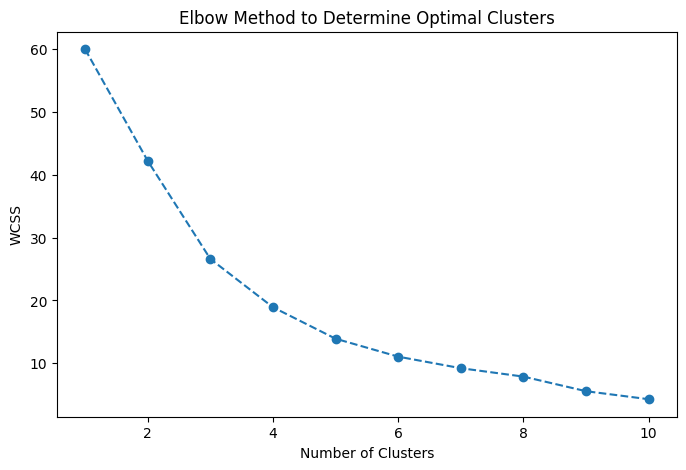

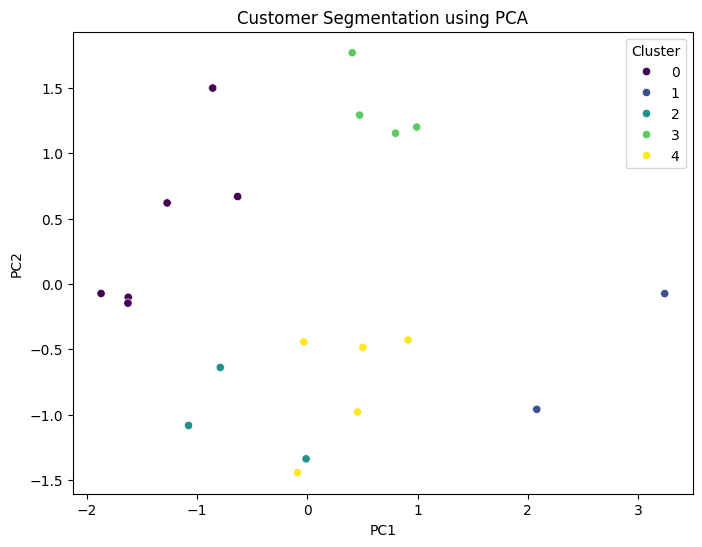

Clustered dataset saved as 'customer_segmented_data.csv'


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Step 2: Load Dataset
df = pd.read_csv('../data/customer_data.csv')

# Step 3: Inspect Data
print("First 5 rows of the dataset:")
print(df.head())

# Drop Customer ID
df.drop('Customer ID', axis=1, inplace=True)


scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

# Step 5: Elbow Method to Determine Optimal Clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method to Determine Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Step 6: Apply K-Means Clustering
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(scaled_df)
df['Cluster'] = cluster_labels

# Step 7: Visualize Clusters using PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])
pca_df['Cluster'] = cluster_labels

# Plot Clusters in 2D
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis')
plt.title('Customer Segmentation using PCA')
plt.show()

# Step 8: Save Clustered Data
df.to_csv('../customer_segmented_data.csv', index=False)
print("Clustered dataset saved as 'customer_segmented_data.csv'")
